# Lab 2



In [25]:
# Task 1: Using pandas package to:
# 1) use info() function to show the column information of these two datasets 
# separately
# 2) use describe() function to show the statistics (count, mean, std, min, ...)
# of these two datasets separately
# 3) show the unique values of the "Ws" (wind speed) column of these two 
# datasets separately
# 4) count how many samples there are in each of these two datasets separately

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# read data 
BejaiaData = pd.read_csv('Bejaia_Region.csv')
SidiData = pd.read_csv('Sidi-Bel_Abbes_Region.csv')

# use info() function to show the column information of these two datasets separately
print("Bejaia Region Data column information:")
print(BejaiaData.info())
print("\n")
print("Sidi-Bel Abbes Region Data column information:")
print(SidiData.info())
print("\n")

# use describe() function to show the statistics (count, mean, std, min, ...) of these two datasets separately
print("Bejaia Region Data column statistics information:")
print(BejaiaData.describe())
print("\n")
print("Sidi-Bel Abbes Region Data column statistics information:")
print(SidiData.describe())
print("\n")

# show the unique values of the "Ws" (wind speed) column of these two datasets separately
BejaiaData_Ws = BejaiaData[' Ws'].unique()
SidiData_Ws = SidiData[' Ws'].unique()
print('Unique values for "Ws" in Bejaia Region: ', BejaiaData_Ws)
print('Unique values for "Ws" in Sidi-Bel_Abbes Region: ', SidiData_Ws)
print("\n")

# count how many samples there are in each of these two datasets separately 
BejaiaData_samples = len(BejaiaData)
SidiData_samples = len(SidiData)
print('There are', BejaiaData_samples, 'samples in Bejaia Region.')
print('There are', SidiData_samples, 'samples in Sidi-Bel_Abbes Region.')
print('\n')


Bejaia Region Data column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB
None


Sidi-Bel Abbes Region Data column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to

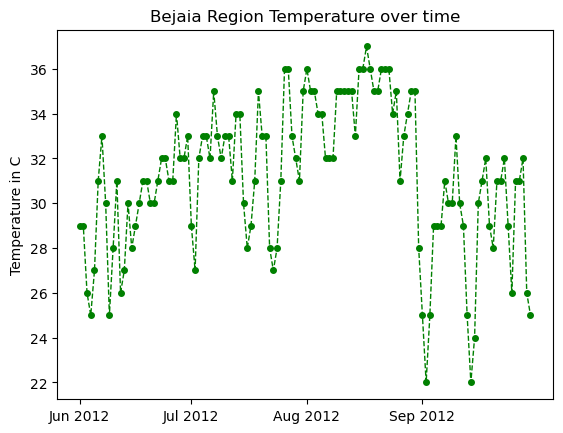

In [26]:
# Task 2: draw a line figure to show the temperature change with time
# for the "Bejaia Region Dataset"

Temp_Bejaia = BejaiaData['Temperature']
NumOfDay = np.arange(len(Temp_Bejaia))

plt.plot(NumOfDay, Temp_Bejaia, color='green', marker='o', 
         linestyle='dashed', linewidth=1, markersize=4)
plt.title("Bejaia Region Temperature over time")
plt.ylabel("Temperature in C")

Xlabel_month_loc = [i for i in NumOfDay if BejaiaData['day'][i] == 1]
Xlabels = ["Jun 2012", "Jul 2012", "Aug 2012", "Sep 2012"]
plt.xticks(Xlabel_month_loc, Xlabels)
plt.show();

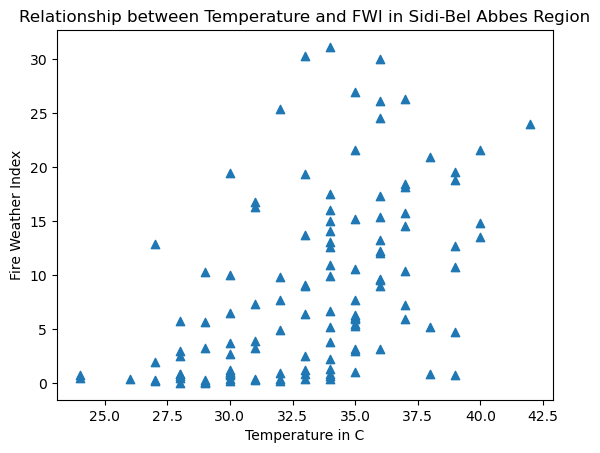

In [27]:
# Task 3: draw a scatterplot figure to show the relationship between 
# the temperature and the Fire Weather Index (FWI) for the 
# "Sidi-Bel Abbes Region Dataset"

plt.scatter(SidiData['Temperature'], SidiData['FWI'], marker='^')
plt.title('Relationship between Temperature and FWI in Sidi-Bel Abbes Region')
plt.xlabel('Temperature in C')
plt.ylabel('Fire Weather Index')
plt.show();

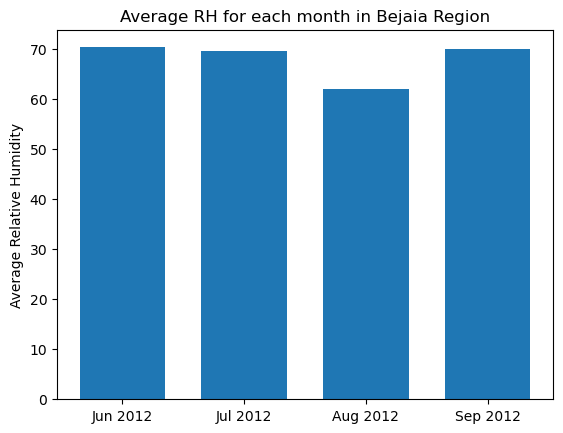

In [28]:
# Task 4: draw a histogram to show the average Relative Humidity (RH) 
# for each month for the "Bejaia Region Dataset"

RH_avgPerMonth = BejaiaData.groupby('month')[' RH'].mean()
plt.bar(range(len(RH_avgPerMonth )), RH_avgPerMonth, 
        width = 0.7, align='center')
plt.title("Average RH for each month in Bejaia Region")
plt.ylabel("Average Relative Humidity")
Xlabels = ["Jun 2012", "Jul 2012", "Aug 2012", "Sep 2012"]
plt.xticks(range(len(RH_avgPerMonth)), Xlabels)
plt.show();

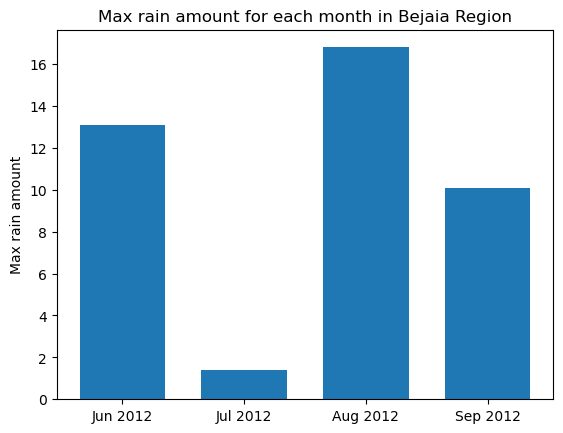

In [29]:
# Task 5: draw a bar figure to show the maximum Rain amount in a day 
# for each month for the "Bejaia Region Dataset"

Rain_MaxPerMonth = BejaiaData.groupby('month')['Rain '].max()
plt.bar(range(len(Rain_MaxPerMonth)), Rain_MaxPerMonth , 
        width = 0.7, align='center')
plt.title("Max rain amount for each month in Bejaia Region")
plt.ylabel("Max rain amount")
Xlabels = ["Jun 2012", "Jul 2012", "Aug 2012", "Sep 2012"]
plt.xticks(range(len(Rain_MaxPerMonth)), Xlabels)
plt.show();

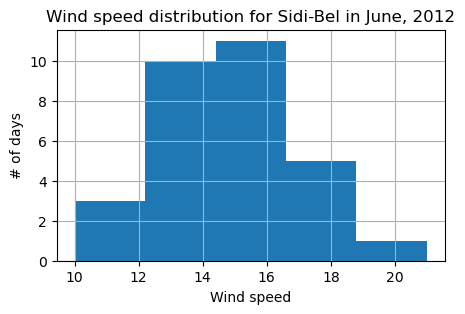

In [30]:
# Task 6: draw a histogram to show the Wind speed (Ws) distribution 
# in 5 bins for the "Sidi-Bel Abbes Region Dataset" in June, 2012

SidiData[' Ws'][SidiData['month'] == 6].hist(bins = 5, grid = True, figsize = (5,3))
plt.title("Wind speed distribution for Sidi-Bel in June, 2012")
plt.ylabel("# of days")  
plt.xlabel("Wind speed")
plt.show();

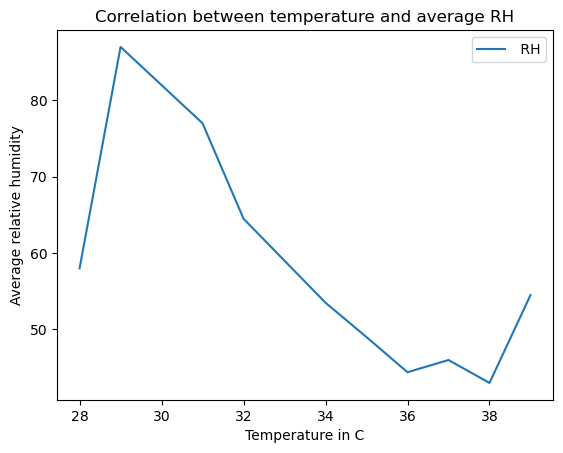

In [31]:
# Task 7: draw a line figure to show the correlation between temperature 
# (Temp) and (average) Relative Humidity (RH) for the "Sidi-Bel Abbes Region 
# Dataset" in July, 2012

Temp_avgRH = SidiData[['Temperature', ' RH']][SidiData['month'] == 7]\
    .groupby('Temperature').mean()
# print(Temp_avgRH)
Temp_avgRH.plot.line()
plt.title("Correlation between temperature and average RH")
plt.xlabel("Temperature in C")
plt.ylabel("Average relative humidity")
plt.show();

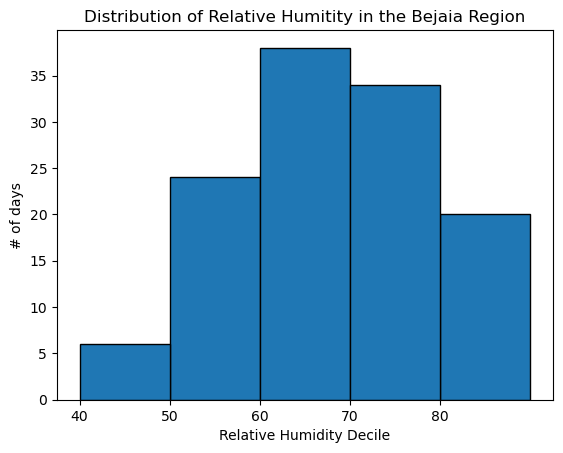

In [32]:
# Task 8: draw a bar figure to show the distribution of Relative Humidity 
# (RH) for the "Bejaia Region Dataset". The x-axis is the decile of Relative 
# Humidity (20s, 30s, ..., 90s), and y-axis is the number of days

from collections import Counter

RH_decile = Counter([(rh // 10 * 10) for rh in BejaiaData[' RH']])
plt.bar([x + 5 for x in RH_decile.keys()], RH_decile.values(), 10, 
        edgecolor=(0, 0, 0))                                
# print(RH_decile.keys())
plt.xticks(sorted(RH_decile.keys()))    
plt.xlabel("Relative Humidity Decile")
plt.ylabel("# of days")
plt.title("Distribution of Relative Humitity in the Bejaia Region")
plt.show()

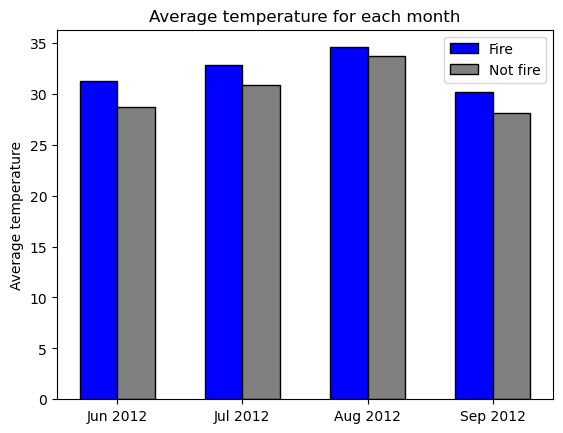

In [33]:
# Task 9: draw a figure (any type you want) to show the average temperature 
# for each month when there is "no fire" and there is "fire" for the 
# "Bejaia Region Dataset"

# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.startswith.html
fire = BejaiaData[BejaiaData['Classes  '].str.startswith('fire')].\
    groupby('month')['Temperature'].mean()
notFire = BejaiaData[BejaiaData['Classes  '].str.startswith('not fire')].\
    groupby('month')['Temperature'].mean()

Xloc = np.arange(len(BejaiaData['month'].unique()))
Xlabels = ["Jun 2012", "Jul 2012", "Aug 2012", "Sep 2012"]

plt.bar(Xloc - 0.15, fire, 0.3, label = 'Fire', edgecolor = (0,0,0), align = 'center', color = 'blue')
plt.bar(Xloc + 0.15, notFire, 0.3, label = 'Not fire', edgecolor = (0,0,0), align = 'center', color = 'gray')
plt.title('Average temperature for each month')
plt.ylabel('Average temperature')
plt.xticks(Xloc, Xlabels)
plt.legend()
plt.show()
